In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a23c656830ed1963d70c1a5999db49b2


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | kaz
Processing Record 2 of Set 13 | la asuncion
Processing Record 3 of Set 13 | tuktoyaktuk
Processing Record 4 of Set 13 | butaritari
Processing Record 5 of Set 13 | punta arenas
Processing Record 6 of Set 13 | mataura
Processing Record 7 of Set 13 | upernavik
Processing Record 8 of Set 13 | gribanovskiy
Processing Record 9 of Set 13 | hermanus
Processing Record 10 of Set 13 | emerald
Processing Record 11 of Set 13 | kruisfontein
Processing Record 12 of Set 13 | kaitangata
Processing Record 13 of Set 13 | yellowknife
Processing Record 14 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 13 | tasiilaq
Processing Record 16 of Set 13 | atuona
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | cabo san lucas
Processing Record 19 of Set 13 | kapaa
Processing Record 20 of Set 13 | maceio
Processing Record 21 of Set 13 | tazovskiy
Processing Record 

Processing Record 35 of Set 16 | touros
Processing Record 36 of Set 16 | nanortalik
Processing Record 37 of Set 16 | rosario
Processing Record 38 of Set 16 | helong
Processing Record 39 of Set 16 | hualmay
Processing Record 40 of Set 16 | yomitan
City not found. Skipping...
Processing Record 41 of Set 16 | morondava
Processing Record 42 of Set 16 | nizwa
Processing Record 43 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 16 | ust-omchug
Processing Record 45 of Set 16 | hamilton
Processing Record 46 of Set 16 | rawson
Processing Record 47 of Set 16 | severo-kurilsk
Processing Record 48 of Set 16 | sloboda
Processing Record 49 of Set 16 | husavik
Processing Record 50 of Set 16 | karkaralinsk
City not found. Skipping...
Processing Record 1 of Set 17 | bouna
Processing Record 2 of Set 17 | wajir
Processing Record 3 of Set 17 | dera bugti
Processing Record 4 of Set 17 | narok
Processing Record 5 of Set 17 | ellisras
Processing Record 6 of Set 17 | kuryk
Process

Processing Record 20 of Set 20 | muborak
Processing Record 21 of Set 20 | oktyabrskiy
Processing Record 22 of Set 20 | bethel
Processing Record 23 of Set 20 | karatsu
Processing Record 24 of Set 20 | chyhyryn
Processing Record 25 of Set 20 | mamontovo
Processing Record 26 of Set 20 | huruta
Processing Record 27 of Set 20 | nguiu
City not found. Skipping...
Processing Record 28 of Set 20 | sindou
Processing Record 29 of Set 20 | kirensk
Processing Record 30 of Set 20 | concordia
Processing Record 31 of Set 20 | emba
Processing Record 32 of Set 20 | sabang
Processing Record 33 of Set 20 | esperance
Processing Record 34 of Set 20 | saint-philippe
Processing Record 35 of Set 20 | beringovskiy
Processing Record 36 of Set 20 | aviemore
Processing Record 37 of Set 20 | saint-doulchard
Processing Record 38 of Set 20 | marathon
Processing Record 39 of Set 20 | kristiansund
Processing Record 40 of Set 20 | ambilobe
Processing Record 41 of Set 20 | athabasca
Processing Record 42 of Set 20 | bueno

Processing Record 10 of Set 24 | mount isa
Processing Record 11 of Set 24 | aklavik
Processing Record 12 of Set 24 | tinskoy
Processing Record 13 of Set 24 | hasaki
Processing Record 14 of Set 24 | nemuro
Processing Record 15 of Set 24 | dhidhdhoo
Processing Record 16 of Set 24 | hedaru
Processing Record 17 of Set 24 | can tho
Processing Record 18 of Set 24 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 24 | nalut
Processing Record 20 of Set 24 | phangnga
Processing Record 21 of Set 24 | bad aussee
Processing Record 22 of Set 24 | cerro grande
Processing Record 23 of Set 24 | khetia
Processing Record 24 of Set 24 | heyang
Processing Record 25 of Set 24 | srednekolymsk
Processing Record 26 of Set 24 | salinas
Processing Record 27 of Set 24 | walvis bay
Processing Record 28 of Set 24 | mount gambier
Processing Record 29 of Set 24 | mandalgovi
Processing Record 30 of Set 24 | yerbogachen
Processing Record 31 of Set 24 | basco
Processing Record 32 of Set 24 | axim
Pr

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaz,52.91,87.31,58.39,60,100,3.29,RU,2020-06-28 17:51:19
1,La Asuncion,11.03,-63.86,82.96,76,6,15.21,VE,2020-06-28 17:50:46
2,Tuktoyaktuk,69.45,-133.04,41.00,86,40,4.70,CA,2020-06-28 17:51:19
3,Butaritari,3.07,172.79,82.47,73,24,12.86,KI,2020-06-28 17:51:19
4,Punta Arenas,-53.15,-70.92,33.80,74,0,6.93,CL,2020-06-28 17:51:19
5,Mataura,-46.19,168.86,42.04,91,99,3.98,NZ,2020-06-28 17:51:19
6,Upernavik,72.79,-56.15,41.04,71,0,10.29,GL,2020-06-28 17:51:20
7,Gribanovskiy,51.46,41.98,67.30,86,59,5.70,RU,2020-06-28 17:51:20
8,Hermanus,-34.42,19.23,55.99,82,44,13.85,ZA,2020-06-28 17:51:20
9,Emerald,-23.53,148.17,57.20,76,75,5.82,AU,2020-06-28 17:51:20


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaz,RU,2020-06-28 17:51:19,52.91,87.31,58.39,60,100,3.29
1,La Asuncion,VE,2020-06-28 17:50:46,11.03,-63.86,82.96,76,6,15.21
2,Tuktoyaktuk,CA,2020-06-28 17:51:19,69.45,-133.04,41.00,86,40,4.70
3,Butaritari,KI,2020-06-28 17:51:19,3.07,172.79,82.47,73,24,12.86
4,Punta Arenas,CL,2020-06-28 17:51:19,-53.15,-70.92,33.80,74,0,6.93
...,...,...,...,...,...,...,...,...,...
574,Broome,US,2020-06-28 17:52:28,42.25,-75.83,75.00,83,75,6.93
575,Dauphin,CA,2020-06-28 17:47:33,51.15,-100.05,64.40,93,75,4.70
576,Kade,DE,2020-06-28 17:52:29,52.38,12.27,73.00,54,93,1.99
577,Auki,SB,2020-06-28 17:52:29,-8.77,160.70,78.30,78,96,3.51


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

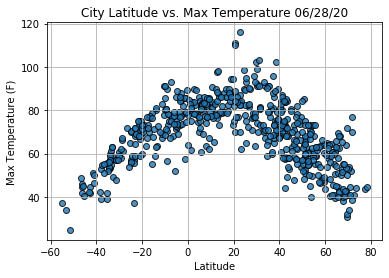

In [12]:
# Import the time module.
import time

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

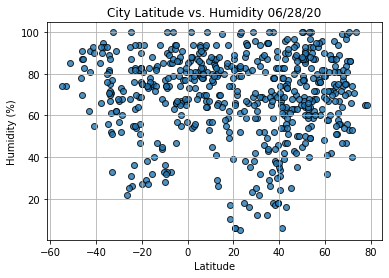

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

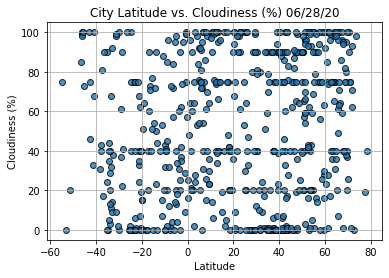

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

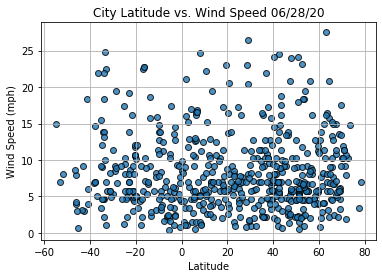

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                     Tasiilaq
Country                        GL
Date          2020-06-28 17:51:20
Lat                         65.61
Lng                        -37.64
Max Temp                     44.6
Humidity                       81
Cloudiness                    100
Wind Speed                  10.29
Name: 13, dtype: object

In [18]:
# filter the dataframe to get all Northern Hemisphere latitudes
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaz,RU,2020-06-28 17:51:19,52.91,87.31,58.39,60,100,3.29
1,La Asuncion,VE,2020-06-28 17:50:46,11.03,-63.86,82.96,76,6,15.21
2,Tuktoyaktuk,CA,2020-06-28 17:51:19,69.45,-133.04,41.00,86,40,4.70
3,Butaritari,KI,2020-06-28 17:51:19,3.07,172.79,82.47,73,24,12.86
6,Upernavik,GL,2020-06-28 17:51:20,72.79,-56.15,41.04,71,0,10.29
...,...,...,...,...,...,...,...,...,...
572,Vila Franca Do Campo,PT,2020-06-28 17:52:28,37.72,-25.43,73.40,78,40,10.29
573,Pontian Kecil,MY,2020-06-28 17:52:28,1.48,103.39,81.00,88,20,8.99
574,Broome,US,2020-06-28 17:52:28,42.25,-75.83,75.00,83,75,6.93
575,Dauphin,CA,2020-06-28 17:47:33,51.15,-100.05,64.40,93,75,4.70


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import Matplotlib.
import matplotlib.pyplot as plt

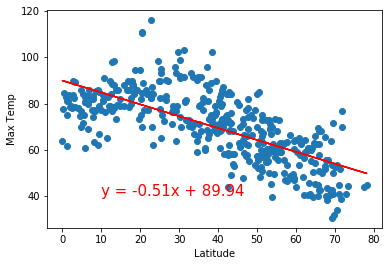

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature','Max Temp',(10,40))      



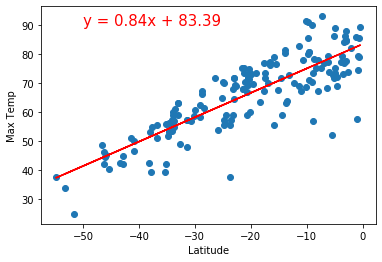

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

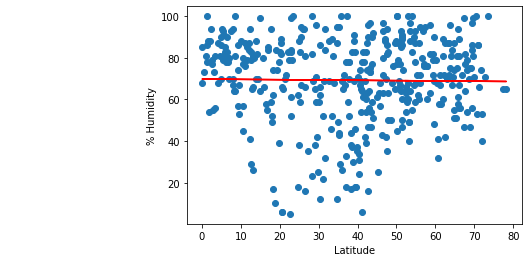

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(-50,60))

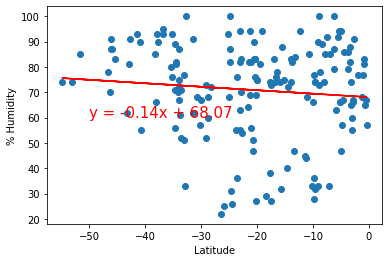

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,60))

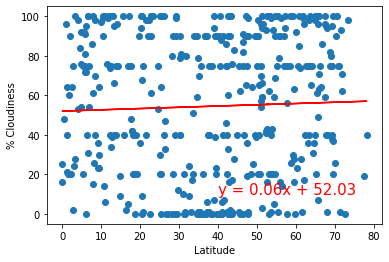

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

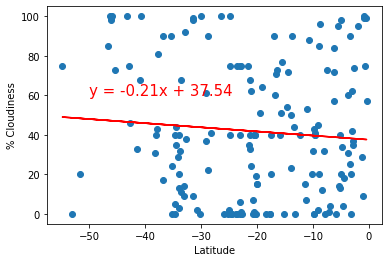

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

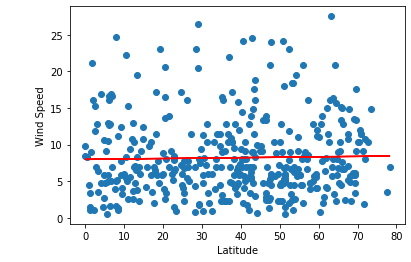

In [27]:
# Linear regression on the Northern Hemisphere - wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(-20,20))

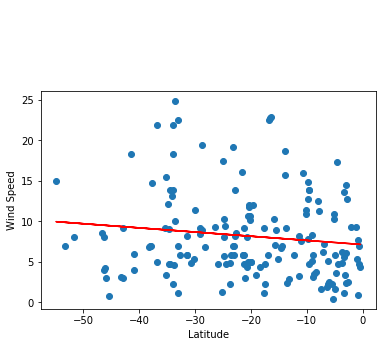

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))